In [1]:
'''

'''

from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import os, sys
import copy
import imageio
import scipy.io as io
import random
import skimage
import pandas as pd
import shutil

from glob import glob
from random import shuffle
from datetime import datetime
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Conv3D, MaxPooling3D, Activation, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from sklearn.utils import class_weight
from skimage.transform import rescale, resize, downscale_local_mean

import keras.backend as K


In [26]:
fname_glob = glob(r'open\train\*.png')

print(fname_glob)

['open\\train\\10000.png', 'open\\train\\10001.png', 'open\\train\\10002.png', 'open\\train\\10003.png', 'open\\train\\10004.png', 'open\\train\\10005.png', 'open\\train\\10006.png', 'open\\train\\10007.png', 'open\\train\\10008.png', 'open\\train\\10009.png', 'open\\train\\10010.png', 'open\\train\\10011.png', 'open\\train\\10012.png', 'open\\train\\10013.png', 'open\\train\\10014.png', 'open\\train\\10015.png', 'open\\train\\10016.png', 'open\\train\\10017.png', 'open\\train\\10018.png', 'open\\train\\10019.png', 'open\\train\\10020.png', 'open\\train\\10021.png', 'open\\train\\10022.png', 'open\\train\\10023.png', 'open\\train\\10024.png', 'open\\train\\10025.png', 'open\\train\\10026.png', 'open\\train\\10027.png', 'open\\train\\10028.png', 'open\\train\\10029.png', 'open\\train\\10030.png', 'open\\train\\10031.png', 'open\\train\\10032.png', 'open\\train\\10033.png', 'open\\train\\10034.png', 'open\\train\\10035.png', 'open\\train\\10036.png', 'open\\train\\10037.png', 'open\\trai

0       transistor
1          capsule
2       transistor
3             wood
4           bottle
           ...    
4272    transistor
4273    transistor
4274          grid
4275        zipper
4276         screw
Name: class, Length: 4277, dtype: object
0 = open\train\10000.png
1 = open\train\10001.png
2 = open\train\10002.png
3 = open\train\10003.png
4 = open\train\10004.png
5 = open\train\10005.png
6 = open\train\10006.png
7 = open\train\10007.png
8 = open\train\10008.png
9 = open\train\10009.png
10 = open\train\10010.png
11 = open\train\10011.png
12 = open\train\10012.png
13 = open\train\10013.png
14 = open\train\10014.png
15 = open\train\10015.png
16 = open\train\10016.png
17 = open\train\10017.png
18 = open\train\10018.png
19 = open\train\10019.png
20 = open\train\10020.png
21 = open\train\10021.png
22 = open\train\10022.png
23 = open\train\10023.png
24 = open\train\10024.png
25 = open\train\10025.png
26 = open\train\10026.png
27 = open\train\10027.png
28 = open\train\10028.png
29 = o

301 = open\train\10301.png
302 = open\train\10302.png
303 = open\train\10303.png
304 = open\train\10304.png
305 = open\train\10305.png
306 = open\train\10306.png
307 = open\train\10307.png
308 = open\train\10308.png
309 = open\train\10309.png
310 = open\train\10310.png
311 = open\train\10311.png
312 = open\train\10312.png
313 = open\train\10313.png
314 = open\train\10314.png
315 = open\train\10315.png
316 = open\train\10316.png
317 = open\train\10317.png
318 = open\train\10318.png
319 = open\train\10319.png
320 = open\train\10320.png
321 = open\train\10321.png
322 = open\train\10322.png
323 = open\train\10323.png
324 = open\train\10324.png
325 = open\train\10325.png
326 = open\train\10326.png
327 = open\train\10327.png
328 = open\train\10328.png
329 = open\train\10329.png
330 = open\train\10330.png
331 = open\train\10331.png
332 = open\train\10332.png
333 = open\train\10333.png
334 = open\train\10334.png
335 = open\train\10335.png
336 = open\train\10336.png
337 = open\train\10337.png
3

607 = open\train\10607.png
608 = open\train\10608.png
609 = open\train\10609.png
610 = open\train\10610.png
611 = open\train\10611.png
612 = open\train\10612.png
613 = open\train\10613.png
614 = open\train\10614.png
615 = open\train\10615.png
616 = open\train\10616.png
617 = open\train\10617.png
618 = open\train\10618.png
619 = open\train\10619.png
620 = open\train\10620.png
621 = open\train\10621.png
622 = open\train\10622.png
623 = open\train\10623.png
624 = open\train\10624.png
625 = open\train\10625.png
626 = open\train\10626.png
627 = open\train\10627.png
628 = open\train\10628.png
629 = open\train\10629.png
630 = open\train\10630.png
631 = open\train\10631.png
632 = open\train\10632.png
633 = open\train\10633.png
634 = open\train\10634.png
635 = open\train\10635.png
636 = open\train\10636.png
637 = open\train\10637.png
638 = open\train\10638.png
639 = open\train\10639.png
640 = open\train\10640.png
641 = open\train\10641.png
642 = open\train\10642.png
643 = open\train\10643.png
6

911 = open\train\10911.png
912 = open\train\10912.png
913 = open\train\10913.png
914 = open\train\10914.png
915 = open\train\10915.png
916 = open\train\10916.png
917 = open\train\10917.png
918 = open\train\10918.png
919 = open\train\10919.png
920 = open\train\10920.png
921 = open\train\10921.png
922 = open\train\10922.png
923 = open\train\10923.png
924 = open\train\10924.png
925 = open\train\10925.png
926 = open\train\10926.png
927 = open\train\10927.png
928 = open\train\10928.png
929 = open\train\10929.png
930 = open\train\10930.png
931 = open\train\10931.png
932 = open\train\10932.png
933 = open\train\10933.png
934 = open\train\10934.png
935 = open\train\10935.png
936 = open\train\10936.png
937 = open\train\10937.png
938 = open\train\10938.png
939 = open\train\10939.png
940 = open\train\10940.png
941 = open\train\10941.png
942 = open\train\10942.png
943 = open\train\10943.png
944 = open\train\10944.png
945 = open\train\10945.png
946 = open\train\10946.png
947 = open\train\10947.png
9

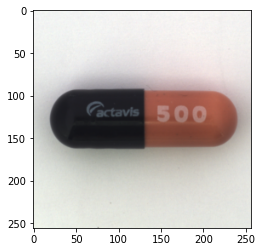

In [2]:
fname_csv = r'open\train_df.csv'

dat_csv = pd.read_csv(fname_csv)

fname_png = dat_csv.loc[:, "file_name"]
class1 = dat_csv.loc[:, "class"]

# print(fname_png)

print(class1)

X_img = list()
y_class = list()

for kk, fname1 in enumerate(fname_glob):
    
    if True and kk < 1000:
        print(f'{kk} = {fname1}')
        img = imageio.imread(fname1)
        img2 = resize(img, (256, 256), anti_aliasing=True)

        # print(img2.shape)

        if img2.ndim==2:
            #img2 = grayscale_to_rgb(img2)
            img2 = np.stack((img2,)*3, axis=-1)
        img2 = 255*img2/np.max(img2)
        img2 = img2.astype(np.uint8)    

        X_img.append(img2)
        y_class.append(class1[kk])

        
plt.figure()
plt.imshow(img2)
plt.show()
        

(256, 256, 3)


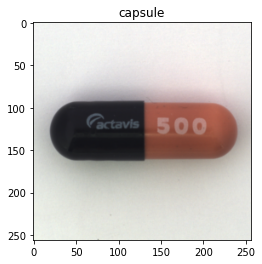

(256, 256, 3)
3
(256, 256, 3)


In [3]:
jj = 1

img3 = X_img[jj]
print(img3.shape)

# img4 = grayscale_to_rgb(img3)

plt.figure()
plt.imshow(img2)
plt.title(f'{y_class[jj]}')
plt.show()

print(X_img[jj].shape)
print(X_img[jj].ndim)
print(img3.shape)


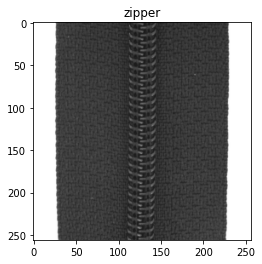

(1000, 1000, 3)


In [4]:
plt.figure()
plt.imshow(X_img[917])
plt.title(f'{y_class[917]}')
plt.show()

print(img.shape)

In [5]:
X_img = np.stack(X_img, axis=0)

print(X_img.shape)

y_class = np.stack(y_class, axis=0)

print(y_class.shape)
print(y_class[23])

print(np.unique(y_class))

class_name = np.unique(y_class)

y_num = np.zeros((y_class.shape[0]))

for k in range(class_name.shape[0]):
    print(f'{k}')
    index = np.where(y_class==class_name[k])
    y_num[index] = k
    

print(index)

print(y_class[4])

# y_num = list()

# for kk in range(y_class.shape[0]):
#     if y_class[i]==class_name[1]

(1000, 256, 256, 3)
(1000,)
pill
['bottle' 'cable' 'capsule' 'carpet' 'grid' 'hazelnut' 'leather'
 'metal_nut' 'pill' 'screw' 'tile' 'toothbrush' 'transistor' 'wood'
 'zipper']
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
(array([ 20,  36,  63,  71,  73,  78,  81,  98, 112, 128, 131, 148, 153,
       174, 182, 194, 212, 228, 235, 236, 259, 289, 337, 340, 352, 361,
       371, 372, 419, 426, 437, 445, 478, 480, 486, 514, 537, 544, 554,
       557, 567, 600, 605, 639, 659, 666, 683, 698, 699, 700, 702, 715,
       726, 729, 741, 750, 753, 757, 763, 774, 775, 802, 811, 834, 849,
       861, 872, 887, 894, 899, 902, 917, 925, 934, 950, 995], dtype=int64),)
bottle


In [6]:
print(np.unique(y_num))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [24]:
#
# transfer learning
#

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights = 'imagenet', include_top=False)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# and a logistic layer -- let's say we have 200 classes

nclass = 15
learning_rate = 0.0001

predictions = Dense(nclass, activation='softmax')(x)


# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)


# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
# model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])


{0: 1.0101010101010102, 1: 1.0101010101010102, 2: 1.2820512820512822, 3: 0.7936507936507936, 4: 1.2820512820512822, 5: 0.6944444444444444, 6: 0.9803921568627451, 7: 0.966183574879227, 8: 0.9009009009009009, 9: 0.7751937984496124, 10: 0.9009009009009009, 11: 3.9215686274509802, 12: 1.2820512820512822, 13: 0.9803921568627451, 14: 0.8771929824561403}
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1000, 256, 256, 3) (1000,) (1000, 15)
(800, 256, 256, 3) (800, 15)


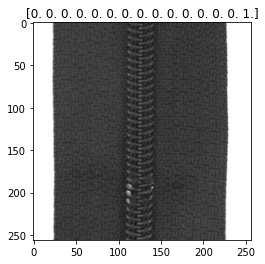

Epoch 1/10
199/200 [============================>.] - ETA: 0s - loss: 0.2729 - accuracy: 0.9862
Epoch 1: saving model to open/model_check\2022-05-05_104328\CNN_e01.h5
200/200 [==============================] - 8s 38ms/step - loss: 0.2715 - accuracy: 0.9862 - val_loss: 5.8881e-04 - val_accuracy: 1.0000
Epoch 2/10
199/200 [============================>.] - ETA: 0s - loss: 0.7160 - accuracy: 0.9623
Epoch 2: saving model to open/model_check\2022-05-05_104328\CNN_e02.h5
200/200 [==============================] - 7s 36ms/step - loss: 0.7124 - accuracy: 0.9625 - val_loss: 0.5601 - val_accuracy: 0.9650
Epoch 3/10
199/200 [============================>.] - ETA: 0s - loss: 0.1706 - accuracy: 0.9749
Epoch 3: saving model to open/model_check\2022-05-05_104328\CNN_e03.h5
200/200 [==============================] - 7s 35ms/step - loss: 0.1698 - accuracy: 0.9750 - val_loss: 0.0147 - val_accuracy: 0.9950
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.0860 - accuracy: 0.9925
Epo

In [27]:
from sklearn.model_selection import train_test_split

now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H%M%S")

filepath = os.path.join('open/model_check', dt_string) + '/CNN_e{epoch:02d}.h5'


checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_num), y=y_num)
class_weights = dict(enumerate(class_weights))

print(class_weights)

# train the model on the new data for a few epochs
# model.fit(...)


gpu_no = '/gpu:0'



y_num_encode = to_categorical(y_num)  # one hot encode



print(y_num_encode[1,:])
print(X_img.shape, y_num.shape, y_num_encode.shape)


X_train, X_val, y_train, y_val = train_test_split(X_img, y_num_encode, test_size=0.2, random_state=1234141)



print(X_train.shape, y_train.shape)

batch_size = 4
n_epochs = 10
ntrain = X_train.shape[0]
nvalid = X_val.shape[0]
steps_per_epoch = ntrain//batch_size


plt.figure()
plt.imshow(X_train[4,:,:,:])
plt.title(f'{y_train[4,:]}')
plt.show()

with K.tf.device(gpu_no):
    
    history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=n_epochs, steps_per_epoch=steps_per_epoch, 
                       class_weight=class_weights, 
                        callbacks = callbacks_list,
                        validation_data=(X_val, y_val) )

# # at this point, the top layers are well trained and we can start fine-tuning
# # convolutional layers from inception V3. We will freeze the bottom N layers
# # and train the remaining top layers.

# # let's visualize layer names and layer indices to see how many layers
# # we should freeze:
# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

# # we chose to train the top 2 inception blocks, i.e. we will freeze
# # the first 249 layers and unfreeze the rest:
# for layer in model.layers[:249]:
#    layer.trainable = False
# for layer in model.layers[249:]:
#    layer.trainable = True

# # we need to recompile the model for these modifications to take effect
# # we use SGD with a low learning rate
# from tensorflow.keras.optimizers import SGD

# model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# # we train our model again (this time fine-tuning the top 2 inception blocks
# # alongside the top Dense layers
# model.fit(...)


{'loss': [0.2715347111225128, 0.7124394774436951, 0.16975116729736328, 0.08600166440010071, 0.0012872241204604506, 2.226770675406442e-06, 1.863685724856623e-06, 1.6095846149255522e-06, 1.3995212384543265e-06, 1.2278379699637298e-06], 'accuracy': [0.9862499833106995, 0.9624999761581421, 0.9750000238418579, 0.9925000071525574, 0.9987499713897705, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [0.00058880599681288, 0.5601310133934021, 0.014735216274857521, 0.00157060194760561, 0.0007270641508512199, 0.0007152030593715608, 0.0007024083752185106, 0.0006908450741320848, 0.0006785639561712742, 0.0006659093778580427], 'val_accuracy': [1.0, 0.9649999737739563, 0.9950000047683716, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


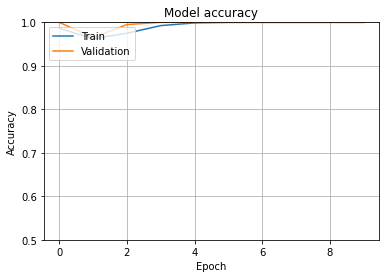

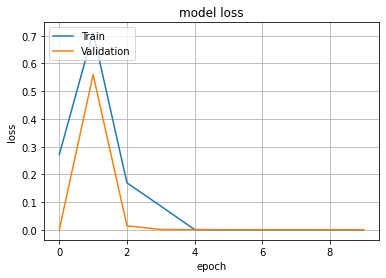

In [28]:
# plot training and validation accuracy/loss values

print(history.history)

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy'); plt.xlabel('Epoch')
plt.ylim([0.5, 1.0])
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss'); plt.xlabel('epoch')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()